In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import pandas_datareader.data as web
import requests
import zipfile as zi
from sklearn import datasets, linear_model
import scipy.special as scsp
import statsmodels.api as sm
import math
from scipy.integrate import quad
from scipy.integrate import quad
from scipy.interpolate import griddata
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from datetime import date
from scipy.stats import norm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dax_data = pd.read_csv("drive/MyDrive/quantitative financial modeling/DAX.csv",encoding='utf-8')
dax_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2010,5975.520020,6048.299805,5974.430176,6048.299805,6048.299805,104344400.0
1,1/5/2010,6043.939941,6058.020020,6015.669922,6031.859863,6031.859863,117572100.0
2,1/6/2010,6032.390137,6047.569824,5997.089844,6034.330078,6034.330078,108742400.0
3,1/7/2010,6016.799805,6037.569824,5961.250000,6019.359863,6019.359863,133704300.0
4,1/8/2010,6028.620117,6053.040039,5972.240234,6037.609863,6037.609863,126099000.0


In [ ]:
start_date , end_date = "2010-05-15" , "2024-05-16"
ticker = "^SPX"
sp500_data = yf.download(ticker,start_date,end_date)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
sp500_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-05-17,1136.520020,1141.880005,1114.959961,1136.939941,1136.939941,5922920000
2010-05-18,1138.780029,1148.660034,1117.199951,1120.800049,1120.800049,6170840000
2010-05-19,1119.569946,1124.270020,1100.660034,1115.050049,1115.050049,6765800000
2010-05-20,1107.339966,1107.339966,1071.579956,1071.589966,1071.589966,8328570000
2010-05-21,1067.260010,1090.160034,1055.900024,1087.689941,1087.689941,5452130000


In [ ]:
#calculating the log_returns for the DAX historical data
dax_log_returns = np.log(dax_data["Adj Close"] / dax_data["Adj Close"].shift(1))
#dax_log_returns = dax_log_returns.dropna()

#calculating the squared returns and realized variance for the DAX historical data
dax_squared_returns = dax_log_returns**2
dax_realized_var = dax_squared_returns.rolling(window=2).sum()
dax_realized_var = dax_realized_var.dropna()
dax_realized_var

2       0.000008
3       0.000006
4       0.000015
5       0.000009
6       0.000265
          ...   
3637    0.000098
3638    0.000273
3639    0.000188
3640    0.000112
3641    0.000111
Name: Adj Close, Length: 3625, dtype: float64

In [ ]:
#calculating the log_returns for the s&p500 historical data
sp500_log_returns = np.log(sp500_data["Adj Close"] / sp500_data["Adj Close"].shift(1))

#calculating the squared returns and realized variance for the s&p500 historical data
sp500_squared_returns = sp500_log_returns**2
# Calculate realized variance with a 21-day rolling window
sp500_realized_var = sp500_squared_returns.rolling(window=2).sum()
sp500_realized_var = sp500_realized_var.dropna()
sp500_realized_var

Date
2010-05-19    0.000231
2010-05-20    0.001607
2010-05-21    0.001803
2010-05-24    0.000391
2010-05-25    0.000169
                ...   
2024-05-09    0.000026
2024-05-10    0.000029
2024-05-13    0.000003
2024-05-14    0.000023
2024-05-15    0.000159
Name: Adj Close, Length: 3522, dtype: float64

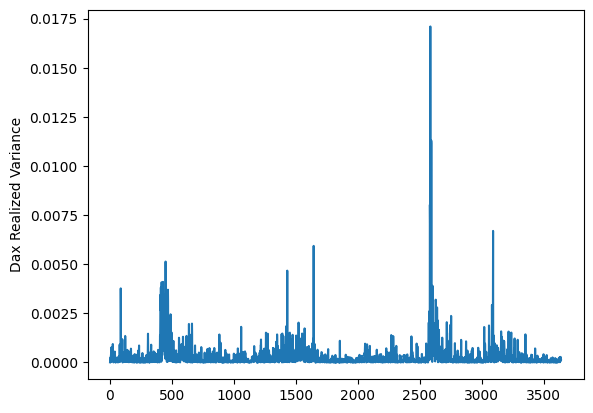

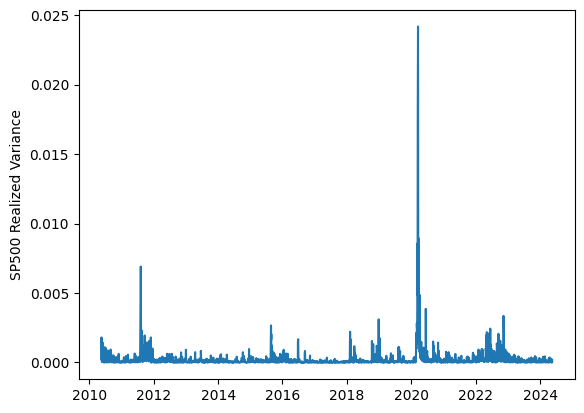

In [ ]:
#plot realized variance
plt.plot(dax_realized_var)
plt.ylabel('Dax Realized Variance')
plt.show()

plt.plot(sp500_realized_var)
plt.ylabel('SP500 Realized Variance')
plt.show()

In [ ]:
#calculate dax log volatility
dax_realized_var['sqrt']= np.sqrt(dax_realized_var)
dax_log_volatility = (dax_realized_var['sqrt'])
dax_log_volatility

2       0.002752
3       0.002517
4       0.003916
5       0.003065
6       0.016280
          ...   
3637    0.009898
3638    0.016529
3639    0.013715
3640    0.010592
3641    0.010517
Name: Adj Close, Length: 3625, dtype: float64

In [ ]:
#calculate s&p500 log volatility
sp500_realized_var['sqrt']= np.sqrt(sp500_realized_var)
sp500_log_volatility = (sp500_realized_var['sqrt'])
sp500_log_volatility

Date
2010-05-19    0.015195
2010-05-20    0.040087
2010-05-21    0.042461
2010-05-24    0.019778
2010-05-25    0.012997
                ...   
2024-05-09    0.005078
2024-05-10    0.005339
2024-05-13    0.001666
2024-05-14    0.004832
2024-05-15    0.012608
Name: Adj Close, Length: 3522, dtype: float64

In [ ]:
#smoothness function for s&p500
def sp500_smoothness(q, x):
  return [np.mean(np.abs(sp500_log_volatility - sp500_log_volatility.shift(lag)) ** q)
  for lag in x]

In [ ]:
#smoothness function for DAX
def dax_smoothness(q, x):
  return [np.mean(np.abs(dax_log_volatility - dax_log_volatility.shift(lag)) ** q)
  for lag in x]

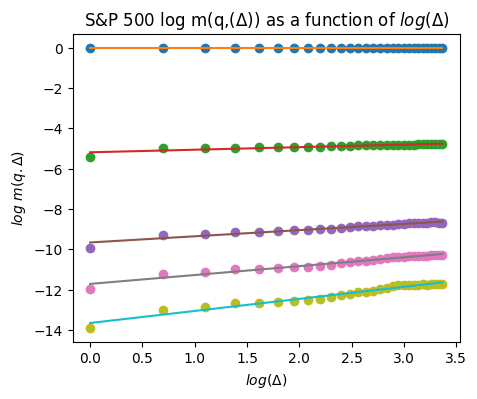

In [ ]:
plt.figure(figsize = (5,4))
plt.title('S&P 500 log m(q,$(\Delta)$) as a function of $log(\Delta)$')
plt.xlabel('$log(\Delta)$')
plt.ylabel('$log\  m(q.\Delta)$')
plt.ylim=(-3, -.5)
sp500_zeta_q = []
qVec = np.array([0, 1,2,2.5, 3])
x = np.arange(1, 30)
for q in qVec:
    plt.plot(np.log(x), np.log(sp500_smoothness(q, x)), 'o')
    model = np.polyfit(np.log(x), np.log(sp500_smoothness(q, x)), 1)
    plt.plot(np.log(x), np.log(x) * model[0] + model[1])
    sp500_zeta_q.append(model[0])

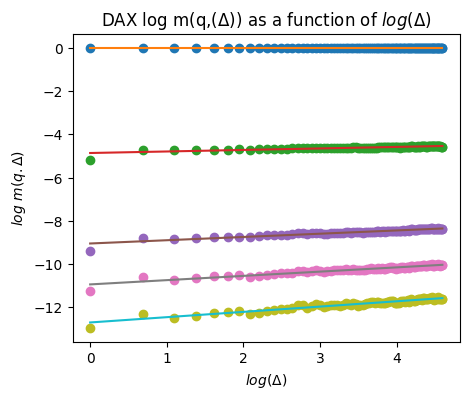

In [ ]:
plt.figure(figsize=(5, 4))
plt.title('DAX log m(q,$(\Delta)$) as a function of $log(\Delta)$')
plt.xlabel('$log(\Delta)$')
plt.ylabel('$log\  m(q.\Delta)$')
plt.ylim=(-3, -.5)
dax_zeta_q = []
qVec = np.array([0, 1,2,2.5, 3])
x = np.arange(1, 100)
for q in qVec:
    plt.plot(np.log(x), np.log(dax_smoothness(q, x)), 'o')
    model = np.polyfit(np.log(x), np.log(dax_smoothness(q, x)), 1)
    plt.plot(np.log(x), np.log(x) * model[0] + model[1])
    dax_zeta_q.append(model[0])




In [ ]:
sp500_zeta_q

[0.0,
 0.12756124262791202,
 0.30669521772443614,
 0.44032495950227163,
 0.5985494576952459]

In [ ]:
dax_zeta_q

[0.0,
 0.07058237733643041,
 0.15093064095946843,
 0.19706457186671608,
 0.24498179244758114]

0.17334633885623354


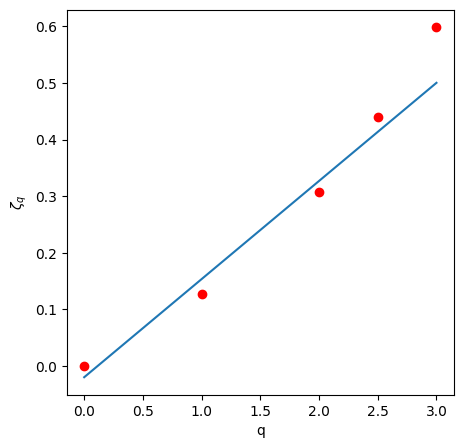

In [ ]:
#estimation oof the H parameter and plot how it deviates from the q for s&p500

plt.figure(figsize=(5,5))
plt.xlabel('q')
plt.ylabel('$\zeta_{q}$')
plt.plot(qVec, sp500_zeta_q, 'or')

line = np.polyfit(qVec[:4], sp500_zeta_q[:4],1)
plt.plot(qVec, line[0] * qVec + line[1])
h_est= line[0]
print(h_est)


0.07852499049452528


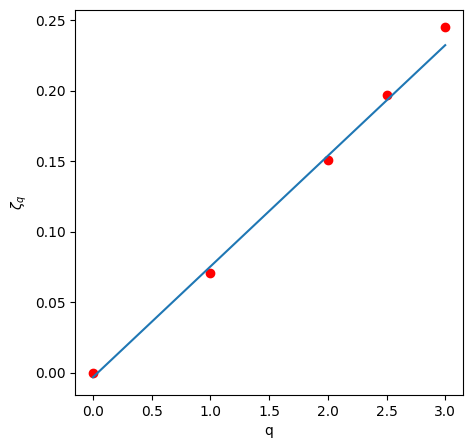

In [ ]:
#estimation oof the H parameter and plot how it deviates from the q for s&p500
plt.figure(figsize=(5,5))
plt.xlabel('q')
plt.ylabel('$\zeta_{q}$')
plt.plot(qVec, dax_zeta_q, 'or')

line = np.polyfit(qVec[:4], dax_zeta_q[:4],1)
plt.plot(qVec, line[0] * qVec + line[1])
dax_h_est= line[0]
print(dax_h_est)

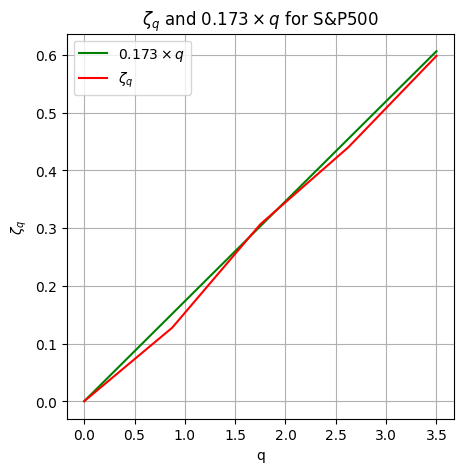

In [ ]:
q = np.linspace(0, 3.5, 5)
plt.figure(figsize=(5, 5))
plt.plot(q, h_est * q, label='$0.173\\times q$', color='green')
plt.plot(q, sp500_zeta_q, 'r-', label='$\\zeta_q$')

plt.xlabel('q')
plt.ylabel('$\\zeta_q$')
plt.legend()
plt.title('$\\zeta_q$ and $0.173 \\times q$ for S&P500')
plt.grid(True)
plt.show()

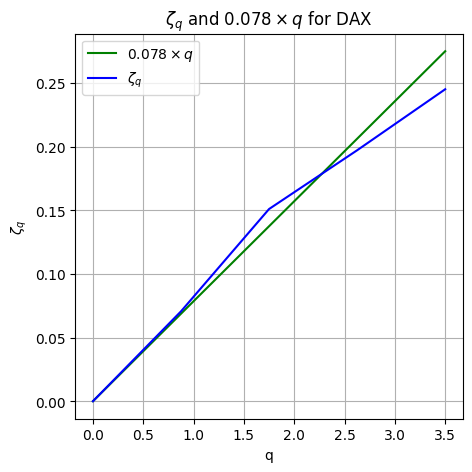

In [ ]:
# Define the range for q
q = np.linspace(0, 3.5, 5)
plt.figure(figsize=(5, 5))
plt.plot(q, dax_h_est * q, label='$0.078 \\times q$', color='green')
plt.plot(q, dax_zeta_q, 'b-', label = '$\\zeta_q$')


plt.xlabel('q')
plt.ylabel('$\\zeta_q$')
plt.legend()
plt.title('$\\zeta_q$ and $0.078 \\times q$ for DAX')
plt.grid(True)
plt.show()


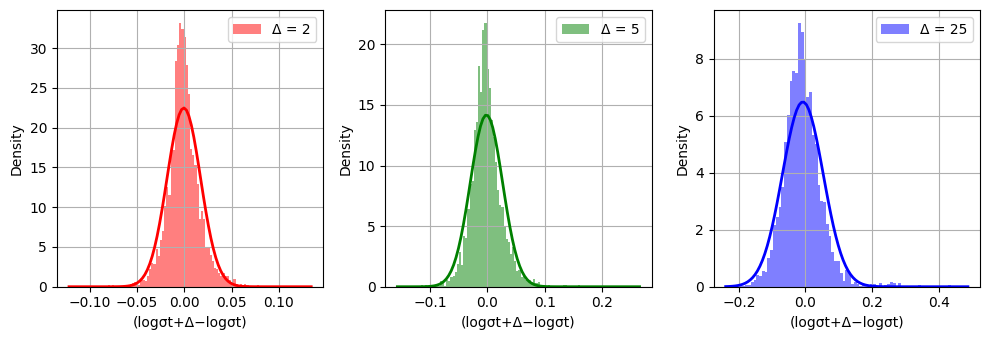

In [ ]:
#s&p500 distribution for increments
# Define the lags
lags = [2, 5, 25]

# Calculate the log differences for each lag
for lag in lags:
    delta = np.log(dax_data['Adj Close'].shift(lag)) - np.log(dax_data['Adj Close'])
    dax_data[f'(logσt+{lag}−logσt)'] = delta

# Create subplots - one for each lag
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))  # Adjust the size as needed

colors = ['r', 'g', 'b']  # Colors for each histogram

for i, lag in enumerate(lags):
    ax = axes[i]
    delta_col = f'(logσt+{lag}−logσt)'
    delta = dax_data[delta_col].dropna()

    # Calculate the density of histograms
    hist, bins = np.histogram(delta, bins='auto', density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    width = np.diff(bins)

    # Plot histogram bars as density in each subplot
    ax.bar(bin_centers, hist, width=width, alpha=0.5, color=colors[i], label=f'Δ = {lag}')

    # Fit a normal distribution to the data
    mean, std = norm.fit(delta)
    x = np.linspace(np.min(delta), np.max(delta), 100)
    y = norm.pdf(x, mean, std)
    if lag == 1:
        y *= 0.05  # Scaling the curve for Δ=1, adjust scaling as necessary

    # Plot the fitted normal distribution
    ax.plot(x, y, color=colors[i], linewidth=2)
    ax.set_xlabel('(logσt+Δ−logσt)')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

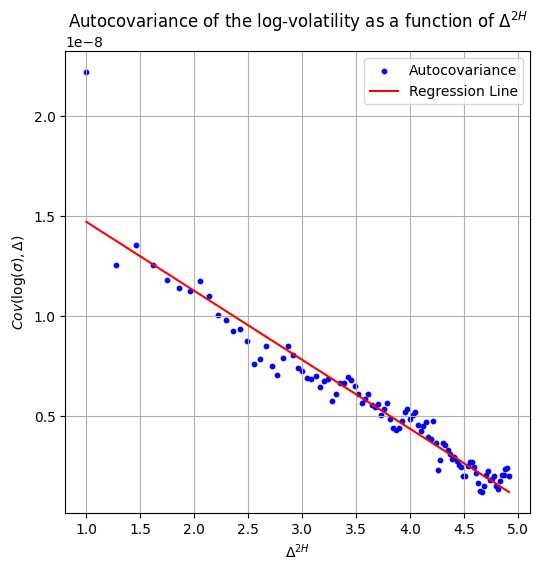

In [ ]:
# Function to calculate autocovariance
def auto_cov(data, lag=1):
    n = len(data)
    mean = np.mean(data)
    AC = []
    for i in range(n - lag):
        autocovariance = (data[i] - mean) * (data[i + lag] - mean)
        AC.append(autocovariance / n)
    return np.array(AC)

# Calculate autocovariance for multiple lags
max_lag = 100  # Adjust as necessary
autocovariances = [auto_cov(dax_log_volatility.dropna().values, lag) for lag in range(1, max_lag + 1)]

# Flatten the list of autocovariances and take the mean for each lag
autocovariances_mean = [np.mean(ac) for ac in autocovariances]

# Hurst exponent
H = 0.173

# Calculate delta and delta^2H
delta = np.arange(1, max_lag + 1)
delta_2H = delta ** (2 * H)

# Fit a regression line
X = delta_2H.reshape(-1, 1)
y = autocovariances_mean

model = LinearRegression()
model.fit(X, y)

# Get the regression line
y_pred = model.predict(X)

# Plot the actual autocovariance data
plt.figure(figsize=(6, 6))
plt.scatter(delta_2H, autocovariances_mean, color='blue', label='Autocovariance', s=10)

# Plot the regression line
plt.plot(delta_2H, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel(r'$\Delta^{2H}$')
plt.ylabel(r'$Cov(\log(\sigma), \Delta)$')
plt.title(r'Autocovariance of the log-volatility as a function of $\Delta^{2H}$')

# Add grid for better readability
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

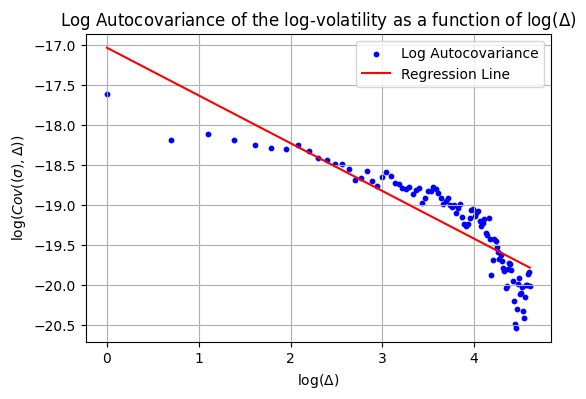

In [ ]:
delta = np.array(delta)
autocovariances_mean = np.array(autocovariances_mean)

# Filter out non-positive values in autocovariances_mean
valid_indices = autocovariances_mean > 0
filtered_delta = delta[valid_indices]
filtered_autocovariances_mean = autocovariances_mean[valid_indices]

# Calculate log(Δ)
log_delta = np.log(filtered_delta)

# Calculate log(autocovariance)
log_autocovariances_mean = np.log(filtered_autocovariances_mean)

# Prepare data for regression
X = log_delta.reshape(-1, 1)
y = log_autocovariances_mean

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the regression model
y_pred = model.predict(X)

# Plot the actual log autocovariance data
plt.figure(figsize=(6, 4))
plt.scatter(log_delta, log_autocovariances_mean, color='blue', label='Log Autocovariance', s=10)

# Plot the regression line
plt.plot(log_delta, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel(r'$\log(\Delta)$')
plt.ylabel(r'$\log(Cov((\sigma), \Delta))$')
plt.title(r'Log Autocovariance of the log-volatility as a function of $\log(\Delta)$')

# Add grid for better readability
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()